## How to call immune subtypes on new data ##

Let's suppose you have some:
  a.) RPKM (or FPKM or something equivlent) gene expression data 
  b.) Has hg19 gene symbols mapped to it.
  c.) knowledge on how to batch correct / normalize it with regard to TCGA PanCancer data*
  
and you'd like to call some immune subtypes on those samples.

In [1]:

library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

In [2]:
#loading TCGA PanCancer EB++ expression data, subset to the pertinent genes.

tcgaSubset <- read.table('../shiny-app/Immune-Subtype-Clustering/data/ebppSubset.tsv.bz2', header = T, sep = '\t', stringsAsFactors = F)
dim(tcgaSubset)
tcgaSubset[1:4,1:5]

[1] 2316 9129

,TCGA.OR.A5J1.01A.11R.A29S.07,TCGA.OR.A5J2.01A.11R.A29S.07,TCGA.OR.A5J3.01A.11R.A29S.07,TCGA.OR.A5J5.01A.11R.A29S.07,TCGA.OR.A5J6.01A.31R.A29S.07
A1CF,0.0000,0.000,0.5925,1.5492,0.000
ABCA1,319.4040,1071.800,896.4600,310.6120,800.283
ABCA8,4.3228,121.997,1368.6900,982.1840,5000.650
ABCB11,0.4803,0.000,1.7775,0.0000,0.000


In [3]:
# need to subset before transforms
reportedScores <- read.table('../shiny-app/Immune-Subtype-Clustering//data//five_signature_mclust_ensemble_results.tsv.gz', sep='\t', header=T, stringsAsFactors = F)
head(reportedScores)
rownames(reportedScores) <- reportedScores$AliquotBarcode

AliquotBarcode,SampleBarcode,ClusterModel1,ClusterModel2,LIexpression_score,CSF1_response,TGFB_score_21050467,Module3_IFN_score,CHANG_CORE_SERUM_RESPONSE_UP
TCGA.02.0047.01A.01R.1849.01,TCGA-02-0047-01A,4,4,-1.3536972,0.8995777,0.09838865,-0.43775189,-0.5989618
TCGA.02.0055.01A.01R.1849.01,TCGA-02-0055-01A,4,4,-0.5016848,1.4674281,1.41870736,0.03473346,0.6990816
TCGA.02.2483.01A.01R.1849.01,TCGA-02-2483-01A,4,4,-0.9197809,0.4884155,-0.50393689,-0.68551726,1.0855086
TCGA.02.2485.01A.01R.1849.01,TCGA-02-2485-01A,4,4,-0.7810493,0.1039455,-0.65700848,1.49949319,0.4496605
TCGA.02.2486.01A.01R.1849.01,TCGA-02-2486-01A,4,4,-0.0361280,1.8245642,-0.27930992,2.53785832,0.1475449
TCGA.04.1348.01A.01R.1565.13,TCGA-04-1348-01A,2,2,0.6439911,0.7957605,-0.63769666,0.90119552,1.8003985


In [4]:
tcgaSubset <- log2(tcgaSubset + 1)

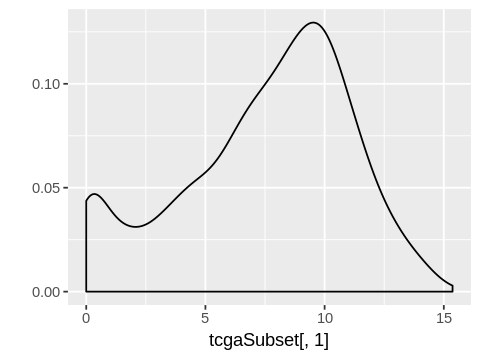

In [5]:
qplot(tcgaSubset[,1], geom='density')

In [6]:
# bring in the new data #
# found some RPKM RNA-seq data
# 
load('../ExtraData/newDat.rda')
dim(newDat)
newDat[1:5,1:5]

[1] 20130     6

,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
TSPAN6,4.866946,5.59851858,6.0323073,8.81300835,7.31116077
DPM1,14.703788,14.54414233,15.2178512,13.48725417,14.18521178
SCYL3,2.613824,2.62848323,2.6941885,2.33930243,2.61831372
C1orf112,2.130704,1.95809753,1.9696715,1.48692841,1.51562986
FGR,0.000000,0.02082027,0.0149617,0.01707083,0.01057218


In [7]:
didx <- !duplicated(as.character(rownames(newDat)))
dat <- newDat[didx,]
dim(dat)
dat[1:5,1:5]

[1] 20130     6

,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
TSPAN6,4.866946,5.59851858,6.0323073,8.81300835,7.31116077
DPM1,14.703788,14.54414233,15.2178512,13.48725417,14.18521178
SCYL3,2.613824,2.62848323,2.6941885,2.33930243,2.61831372
C1orf112,2.130704,1.95809753,1.9696715,1.48692841,1.51562986
FGR,0.000000,0.02082027,0.0149617,0.01707083,0.01057218


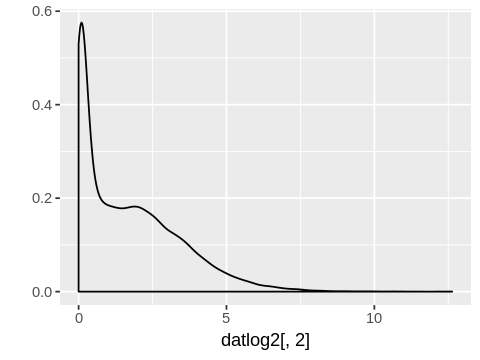

In [8]:
datlog2 <- log2(dat+1)
qplot(datlog2[,2], geom='density')

In [9]:
ls()

[1] "dat"            "datlog2"        "didx"           "newDat"        
[5] "reportedScores" "tcgaSubset"

In [10]:
datlog2[1:5,1:5]


,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
TSPAN6,2.552610,2.72214216,2.81399811,3.29469549,3.05504998
DPM1,3.973041,3.95829911,4.01951077,3.85671228,3.92459512
SCYL3,1.853526,1.85936660,1.88525748,1.73954676,1.85531750
C1orf112,1.646487,1.56466962,1.57030337,1.31436498,1.33091967
FGR,0.000000,0.02972888,0.02142528,0.02442015,0.01517237


In [11]:
# clean up
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,799392,42.7,4875548,260.4,8639914,461.5
Vcells,27237452,207.9,92245244,703.8,92243078,703.8


In [12]:
### joining data sets ###
sharedGenes  <- intersect(rownames(tcgaSubset), rownames(dat))

# first median scale each data set
newDatSub    <- datlog2[sharedGenes,]
newDatSubMeds<- apply(newDatSub, 1, median, na.rm=T)  
newDatSub    <- sweep(newDatSub,1,newDatSubMeds,'-')


In [13]:
ls()
gc()

[1] "dat"            "datlog2"        "didx"           "newDat"        
[5] "newDatSub"      "newDatSubMeds"  "reportedScores" "sharedGenes"   
[9] "tcgaSubset"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,801665,42.9,3900438,208.4,8639914,461.5
Vcells,27262997,208.1,92245244,703.8,92243078,703.8


In [14]:
dim(dat)
dim(newDatSub)
length(sharedGenes)

[1] 20130     6

[1] 2227    6

[1] 2227

In [15]:
dim(tcgaSubset)

[1] 2316 9129

In [16]:
tcgaSubsetSub <- tcgaSubset[sharedGenes,]

rm(tcgaSubset)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,801790,42.9,3120350,166.7,8639914,461.5
Vcells,26450808,201.9,92245244,703.8,92243078,703.8


In [17]:
tcgaSubsetSubMeds <- apply(tcgaSubsetSub, 1, median, na.rm=T)
head(tcgaSubsetSubMeds)

A1CF    ABCA1    ABCA8   ABCB11    ABCB1    ABCC3 
0.000000 9.871967 5.832206 0.503654 6.548187 9.564424

In [18]:
tcgaSubsetSub <- sweep(tcgaSubsetSub,1,tcgaSubsetSubMeds,'-')  

In [19]:
gc()
ls()
rm(dat, datlog2, didx, newDat)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,802437,42.9,2496280,133.4,8639914,461.5
Vcells,26453932,201.9,108074776,824.6,135093263,1030.7


[1] "dat"               "datlog2"           "didx"             
 [4] "newDat"            "newDatSub"         "newDatSubMeds"    
 [7] "reportedScores"    "sharedGenes"       "tcgaSubsetSub"    
[10] "tcgaSubsetSubMeds"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,784527,41.9,2496280,133.4,8639914,461.5
Vcells,26020941,198.6,86459820,659.7,135093263,1030.7


In [20]:
library(pryr)
mem_used()

253 MB

In [21]:

  # then join them at the genes
joinDat      <- cbind(newDatSub, tcgaSubsetSub)

dim(joinDat)

[1] 2227 9135

In [22]:
library(sva)

combatflag <- 1
if (combatflag) {
    # then batch correction between scores...
    batch <- c(rep(1,ncol(newDatSub)), rep(2,ncol(tcgaSubsetSub)))
    modcombat = model.matrix(~1, data=as.data.frame(t(joinDat)))
    combat_edata = ComBat(dat=joinDat, batch=batch, mod=modcombat, 
                          par.prior=TRUE, prior.plots=FALSE, ref.batch = 2)
} else {
    combat_edata = joinDat    
}

dim(combat_edata)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-26. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel


Using batch = 2 as a reference batch (this batch won't change)


Found2batches
Adjusting for0covariate(s) or covariate level(s)
Found39158Missing Data Values 


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



[1] 2227 9135

In [23]:
# then let's get all the genes we need for the 5 signatures
load('../shiny-app/Immune-Subtype-Clustering/data/comparative_immuneSigs_geneLists4.rda')

# and we use the scoring code to produce scores #
source('../shiny-app/Immune-Subtype-Clustering/src/ImmuneSigs68_function.R')

In [25]:

### compute scores.
scores <- ImmuneSigs_function(combat_edata, sigs1_2_eg2,sigs12_weighted_means,
                                 sigs12_module_weights,sigs1_2_names2,sigs1_2_type2)

print(dim(scores))
scores[1:5,1:5]

[1] "DONE MEAN"
[1] "DONE MEDIAN"
[1] "DONE WEIGHTED MEAN"
[1] "DONE MODULES"
[1] "DONE CHANG CORE"
[1] "DONE PCA"
[1] "DONE DONE"
[1]    5 9135


,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
LIexpression_score,0.0167,-0.0266,-0.3010,0.1541,0.0936
CSF1_response,-0.0321,-0.0147,-0.1208,0.1383,-0.0224
TGFB_score_21050467,0.0056,-0.0477,-0.1365,0.0836,0.0426
Module3_IFN_score,1.6188,0.6714,0.7665,-0.1996,-1.3660
CHANG_CORE_SERUM_RESPONSE_UP,0.4469,0.5782,0.6755,-0.6897,-0.3448


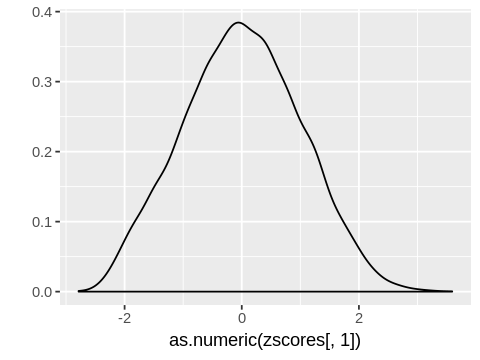

In [26]:


source('../shiny-app/Immune-Subtype-Clustering/src/signature_mclust_ensemble.R')

# and load the models trained on TCGA data #
load('../shiny-app/Immune-Subtype-Clustering/data/wolf_set_slim1.rda')

zscore.cols2<-function(x){
    return((apply(x, 2, function(x) (x - median(na.omit(x)))/sd(na.omit(x)))))
}

                  
# and we subset the 5 scores used in clustering
idx <- c("LIexpression_score", "CSF1_response", "TGFB_score_21050467", "Module3_IFN_score", "CHANG_CORE_SERUM_RESPONSE_UP")
scores <- t(scores[idx,])
zscores <- zscore.cols2(scores)

qplot(as.numeric(zscores[,1]), geom='density')

In [27]:
gc()
zscores[1:5,1:5]
dim(zscores)


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3743095,200.0,6771768,361.7,8639914,461.5
Vcells,45126107,344.3,238840754,1822.3,298549269,2277.8


,LIexpression_score,CSF1_response,TGFB_score_21050467,Module3_IFN_score,CHANG_CORE_SERUM_RESPONSE_UP
rpkm.exp_005_shNTC_rep1,0.019968752,0.01400853,0.03212885,1.3510661,1.262946
rpkm.exp_005_shNTC_rep2,-0.004806233,0.03015081,-0.04364406,0.6125477,1.641887
rpkm.exp_005_shNTC_rep3,-0.161809833,-0.06827999,-0.16988486,0.6866802,1.922702
rpkm.exp_005_shTRPS1_seq1,0.098584987,0.17209154,0.14301604,-0.0664152,-2.017365
rpkm.exp_005_shTRPS1_seq2,0.063968668,0.02300739,0.08472919,-0.9756487,-1.021959


[1] 9135    5

In [29]:

  # load the clustering model trained on all pancan data.
library(clue)
library(mclust)
library(parallel)
load("../shiny-app/Immune-Subtype-Clustering//data/wolf_set_slim1.rda")

  # make cluster calls using the models.
calls <- consensusEnsemble(mods2, zscores, 4, 256)
  

Loading required package: mclust
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: ‘mclust’

The following object is masked from ‘package:mgcv’:

    mvn

Iteration: 0 *** value: 8051.69


In [30]:
  
  # get the top scoring cluster for each sample
maxcalls <- apply(calls$.Data, 1, function(a) which(a == max(a))[1])
names(maxcalls) <- rownames(scores)
  

In [31]:
  # then we'll look at the new vs. old cluster calls for TCGA samples
sharedIDs <- intersect(reportedScores$AliquotBarcode, rownames(scores))
t1 <-table(Reported=as.numeric(reportedScores[sharedIDs, 'ClusterModel1']),
             NewCalls=as.numeric(maxcalls[sharedIDs]))
t1

        NewCalls
Reported    1    2    3    4    5    6
       1   66    0 2268   25   22   35
       2 2558    0    3   12    8   11
       3    2    1   16   46    6 2326
       4   16    9   30 1045    1   58
       5    0  368    0   14    0    3
       6    8    0    9    6  120   37

In [32]:
  # then we can align the new calls to old calls.
reported <- 1:6
optcalls <- 1:6

for (i in reported) {
    
    # for subtype i, where did most of the samples end up?
    j <- which(as.numeric(t1[i,]) == max(as.numeric(t1[i,])))
    # rename maxcall j <- i
    optcalls[i] <- j
}
  
print(optcalls)
  

[1] 3 1 6 4 2 5


In [33]:
  
# these are the re-mapped calls
alignedCalls <- sapply(maxcalls, function(a) which(a == optcalls)[1])


In [34]:
# make sure it works
t2 <-table(Reported=as.numeric(reportedScores[sharedIDs, 'ClusterModel1']),
             NewCalls=as.numeric(alignedCalls[sharedIDs]))

t2

        NewCalls
Reported    1    2    3    4    5    6
       1 2268   66   35   25    0   22
       2    3 2558   11   12    0    8
       3   16    2 2326   46    1    6
       4   30   16   58 1045    9    1
       5    0    0    3   14  368    0
       6    9    8   37    6    0  120

In [38]:
ls()
colnames(newDatSub)

[1] "alignedCalls"             "batch"                   
 [3] "calls"                    "combat_edata"            
 [5] "combatflag"               "consensusEnsemble"       
 [7] "data_genes_sigs12b"       "determineK"              
 [9] "ensemblePredict"          "get.distances"           
[11] "i"                        "idx"                     
[13] "ImmuneSigs_function"      "j"                       
[15] "jdx"                      "joinDat"                 
[17] "maxcalls"                 "mcentr"                  
[19] "modcombat"                "modelEnsemble"           
[21] "mods2"                    "newDatSub"               
[23] "newDatSubMeds"            "optcalls"                
[25] "pcalls"                   "pred1"                   
[27] "predStrength"             "reported"                
[29] "reportedScores"           "sample.scores"           
[31] "scores"                   "sharedGenes"             
[33] "sharedIDs"                "sigs1_2_eg2"             
[35] "sigs1_2_egIDs2"           "sigs1_2_names2"          
[37] "sigs1_2_type2"            "sigs12_module_weights"   
[39] "sigs12_module_weights_eg" "sigs12_weighted_means"   
[41] "sigs2"                    "t1"                      
[43] "t2"                       "tcgaSubsetSub"           
[45] "tcgaSubsetSubMeds"        "zscore.cols2"            
[47] "zscore.rows2"             "zscores"

[1] "rpkm.exp_005_shNTC_rep1"   "rpkm.exp_005_shNTC_rep2"  
[3] "rpkm.exp_005_shNTC_rep3"   "rpkm.exp_005_shTRPS1_seq1"
[5] "rpkm.exp_005_shTRPS1_seq2" "rpkm.exp_005_shTRPS1_seq3"

In [39]:
# assemble the results
jdx <- match(table=rownames(scores), x=colnames(newDatSub))  # index to new data scores
pcalls <- calls$.Data[jdx,]                            # get that table
rownames(pcalls) <- colnames(newDatSub)                      # name it from the new data
pcalls <- pcalls[,optcalls]
  
pcalls <- cbind(pcalls, data.frame(Call=alignedCalls[jdx]))  # bring in the aligned calls
pcalls <- cbind(pcalls, zscores[jdx,])                       # and the scores
    

In [40]:
head(pcalls)

,1,2,3,4,5,6,Call,LIexpression_score,CSF1_response,TGFB_score_21050467,Module3_IFN_score,CHANG_CORE_SERUM_RESPONSE_UP
rpkm.exp_005_shNTC_rep1,0.02734375,0.93750000,0.0000000,0.00000000,0.00000000,0.03515625,2,0.019968752,0.01400853,0.03212885,1.3510661,1.262946
rpkm.exp_005_shNTC_rep2,0.06250000,0.89843750,0.0000000,0.00000000,0.00000000,0.03906250,2,-0.004806233,0.03015081,-0.04364406,0.6125477,1.641887
rpkm.exp_005_shNTC_rep3,0.03515625,0.91015625,0.0000000,0.00390625,0.00000000,0.05078125,2,-0.161809833,-0.06827999,-0.16988486,0.6866802,1.922702
rpkm.exp_005_shTRPS1_seq1,0.03125000,0.00000000,0.8984375,0.00781250,0.00000000,0.06250000,3,0.098584987,0.17209154,0.14301604,-0.0664152,-2.017365
rpkm.exp_005_shTRPS1_seq2,0.00000000,0.00000000,0.9687500,0.00000000,0.00390625,0.02734375,3,0.063968668,0.02300739,0.08472919,-0.9756487,-1.021959
rpkm.exp_005_shTRPS1_seq3,0.06250000,0.00390625,0.2851562,0.44140625,0.00390625,0.20312500,4,0.029695652,0.05018950,0.20485697,-1.3985389,-1.827173


In [ ]:
finalResults <- list(AlignedCalls=alignedCalls[jdx], Table=t2, ProbCalls=pcalls)